# Instructions to export slides

We might be interested in hiding the code of some slides, e.g. when displaying a video. In order to achieve this,
 the metadata of the cell has to be edited to include "to_remove" tag from the View->Cell Toolbar->Edit Metadata option.
 
For instance:
 
```js
{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "slide"
    }
}
```

In order for this to take effect, the slideshow must be compiled via the terminal using:
```sh
jupyter nbconvert presentation.ipynb --to slides --no-prompt --TagRemovePreprocessor.remove_input_tags {\"to_remove\"} --post serve --SlidesExporter.reveal_theme=simple
```

# Introducción a las menciones II
## Módulo Computación Científica

### Dr. Cristian Barrera Hinojosa
### cristian.barrera@uv.cl

#### Clases disponibles en:
https://crisbh.github.io/intro_menciones_II/clases.html 

# Temas

1. Métodos de simulaciones
2. Análisis de datos
3. Machine learning
4. Visualización de datos

# Evaluación

- Evaluación en modalidad remota (a través del Aula Virtual).
- Fecha: jueves 30 de Octubre durante el horario de clases.

# Métodos de las simulaciones

Al final del semestre pasado, hablamos sobre la **utilidad** de las simulaciones computacionales y algunos ejemplos.

Ahora veremos las **técnicas** que se usan para crear simulaciones.

* En general, hacemos simulaciones con el objetivo de **<span style="color:blue">reproducir algún fenómeno que se presenta en nuestro Universo.</span>**

In [19]:
%%HTML
<div style="position:relative;padding-bottom:56.25%;height:0;overflow:hidden;">
  <iframe
    src="https://www.youtube-nocookie.com/embed/3pK5oenm5gw?rel=0&modestbranding=1"
    title="YouTube video"
    frameborder="0"
    allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share"
    allowfullscreen
    style="position:absolute;top:0;left:0;width:100%;height:100%;">
  </iframe>
</div>


El primer desafío es: 

- ¿Cómo podemos representar el espacio y el tiempo en un computador?

### Lo continuo y el computador

* Normalmente pensamos que el espacio y el tiempo son *continuos*.

* Como ejemplo, considere una parte de la línea de los números reales ($\mathbb{R}$):

![](clase1_imagenes/real_numbers.png)

* Hay un número infinito de números entre cualquier par de números reales (propiedad de *densidad* de $\mathbb{R}$). Es decir, existe un *contínuo* de números.

* Sin embargo, debido a su memoria finita, no podemos representar el concepto de *continuidad* exactamente en un computador.

### Discretización del espacio y el tiempo

Por esa razón, hay que representar el espacio y el tiempo en una forma **<span style="color:blue">discreta</span>** (en trozos, y no continua).

* Por ejemplo, podríamos considerar solamente los números enteros.

Además, el "universo" o "dominio" de la simulación tiene que ser *finito*. Este "dominio" se suele llamar "caja computacional".

Un poco de jerga de simulaciones:
* **Pasos del tiempo (time-steps)**: conjunto de valores discretos del tiempo utilizados en la simulación.
* **Resolución**: número de valores en el espacio y/o el tiempo que ocupamos en la simulación.

    * Una simulación con más puntos en el espacio (para el mismo tamaño total de la simulación) tiene mejor resolución espacial.
    * Con más puntos en el tiempo (para el mismo intervalo total del tiempo) tiene más resolución temporal.


En algunos sentidos, las simulaciones se parecen mucho a un videojuego:
- En ambos casos, intentamos recrear el estado de un sistema en una secuencia de pasos de tiempo.
- Mientras más cortos sean dichos pasos de tiempo, mas "fluida" o "suave" será dicha recreación.

- En un videojuego, una mayor resolución "espacial" significa mayor cantidad de pixeles y por lo tanto mayor "fidelidad gráfica".
- En una simulación, una mayor resolución significa mayor cantidad puntos del espacio (o tiempo) representados, lo que significa una representación más cercana a nuestra realidad continua.

El llamado *Juego de la vida* es un ejemplo de simulación:

![](clase1_imagenes/gameoflife.png)

* El espacio está discretizado: las celdas tienen posiciones específicas (una cuadrícula).
* El tiempo también está discretizado: en cada paso de tiempo tenemos una nueva generación de células vivas.
* También el "universo" o "dominio" de la simulación es finito.

## Un ejemplo de la física: el oscilador armónico simple

De acuerdo a la Segunda Ley de Newton, una partícula de masa $m$ sometida a una fuerza $F$ experimentará una aceleración derminada por:

$$m a = F(x,t)$$

Por definición, la aceleración no es más que el cambio de la velocidad en el tiempo. A su vez, la velocidad es el cambio de la posición $x(t)$ en el tiempo.

Esto implica que **la posición** $x(t)$ de una partícula se rige según:

$$m\frac{d^2x}{dt^2} = F(x,t)$$

Si conocemos $F$, entonces podemos hacer una simulación del movimiento de la partícula: es decir, podemos resolver la *ecuación diferencial* numéricamente.

### Pero primero: ¿qué es una ecuación diferencial?

Consideremos el caso de un oscilador ármonico simple (movimiento armónico simple):

![](clase1_imagenes/harmonic.png)

En este sistema, la fuerza está dada por la llamada *Ley de Hooke*: 

$$F(x) = -kx$$ 

Por lo tanto la ecuación que tenemos que resolver es

$$\frac{d^2x}{dt^2} = -\frac{k}{m}x$$

Este tipo de ecuaciones se denomina ***<span style="color:blue">ecuación diferencial</span>***: nuestro desafío es llegar a encontrar la posición como función del tiempo, $x(t)$.

¿Como la resolvemos? Primero utilizaremos Python. Luego intentaremos resolverla "a mano".

En Python, hay una función del módulo `SciPy` que puede resolver ecuaciones diferenciales. 

Este funciona con ecuaciones diferenciales de *primer* orden, no de *segundo* orden (como lo que tenemos arriba). Pero es fácil convertir la ecuación en dos ecuaciones de primer orden:

$$\frac{dx}{dt} = v$$

$$\frac{dv}{dt} = -\frac{k}{m}x$$

Estas son las ecuaciones que vamos a resolver con Python.

In [1]:
from numpy import *
from matplotlib.pyplot import *

%matplotlib inline
# Correct size for figures in slideshow
rcParams["figure.figsize"] = (5, 4)
rcParams["figure.dpi"] = 100

In [2]:
from scipy import integrate

Definimos los lados derechos de las ecuaciones arriba escribiendo una **función** de Python.

El primer argumento a la función será una lista `Y` de dos elementos:
- El primer elemento `Y[0]` es un valor de $x$.
- El segundo elemento `Y[1]` es un valor de $v$.

In [3]:
def ecuaciones(Y, t, k, m):
    x, v = Y
    return [v, -(k/m)*x]

Por lo tanto, para $x$ y $v$ dados (Y), esta función *retorna* el lado derecho de su respectiva ecuación.

Ahora vamos a elegir los instantes en el tiempo (timesteps) que queremos representar: 

- Creamos un arreglo de valores en el tiempo con el uso de `linspace`.

In [ ]:
tiempo = linspace(0, 25, 100)

Este arreglo contiene los 100 pasos de tiempo (timesteps) a utilizar.

Definimos el valor de $k$, la constante del resorte, y la masa $m$. También necesitamos las *condiciones iniciales*: los valores de $x$ y $v$ en el momento $t=0$.

Las unidades de $k$ son kg m/s$^2$. Entonces, si la masa está en kg, las posiciones están en metros, y tiempo está en segundos.

In [5]:
k = 1.0
m = 1.0
x0 = 0.0
v0 = 1.0

Para resolver las ecuaciones (es decir, integrarlas) vamos a ocupar la función `odeint` del submódulo `integrate` de *SciPy*.

In [6]:
solucion = integrate.odeint(ecuaciones, [x0, v0], tiempo, args=(k,m))

In [7]:
solucion.shape

(100, 2)

Tenemos una solución numérica a la ecuación diferencial que describe el sistema. Los valores en la primera columna del arreglo `solucion` son los valores de $x(t)$ y la segunda columna es $v(t)$.

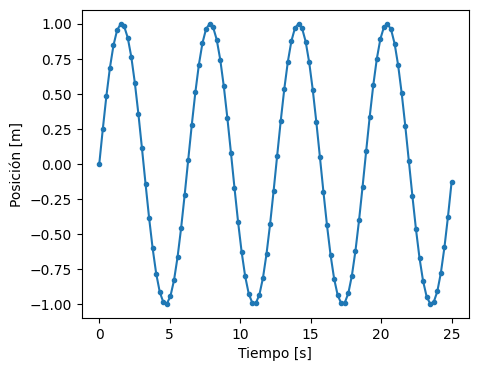

In [8]:
Hacemos un gráfico de la posición de la masa en tiempo:

plot(tiempo, solucion[:,0], marker='.')
xlabel("Tiempo [s]")
ylabel("Posición [m]")
show()

Ahora hacemos un gráfico de la velocidad de la masa en tiempo.

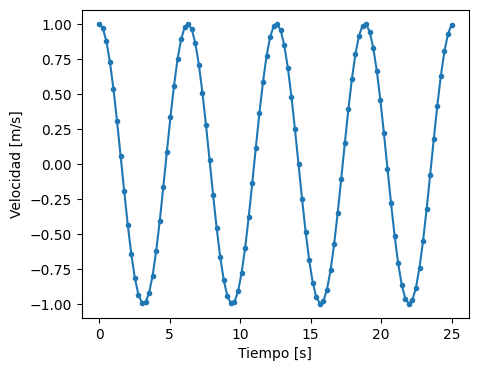

In [9]:
plot(tiempo, solucion[:,1], marker='.')
xlabel("Tiempo [s]")
ylabel("Velocidad [m/s]")
show()

**Hemos hecho una simulación computacional!** Obtuvimos una solución a las ecuaciones del sistema en forma *numérica* (y no analítica).

De hecho, en este caso podemos resolver la ecuación diferencial analíticamente. Podemos ver la solución utilizando otro módulo de Python, `Sympy`.

Podemos escribir la ecuación diferencial en otra forma:

$$m\frac{d^2x}{dt^2} = -kx$$

$$\rightarrow \quad \ddot{x} + \omega_0^2 x = 0$$

donde $\omega_0^2 = k/m$.

In [10]:
# Ahora usamos Sympy para determinar la solución en una manera *analítica*

import sympy
sympy.init_printing()

Vamos a simplificar la ecuación un poco. Elegimos $k = 1$ y $m = 1$ para eliminar estas variables.

In [11]:
t = sympy.symbols('t')
x = sympy.Function('x')

In [12]:
sol = sympy.dsolve( sympy.Derivative(x(t),t,2) + x(t) )
sol

x(t) = C₁⋅sin(t) + C₂⋅cos(t)

Esta es la solución general a la ecuación diferencial de segundo orden (con $\omega_0^2 = 1$). Se puede determinar las constantes $C_1$ y $C_2$ por las condiciones iniciales:

$$x(0) = 0, \quad v(0) = 1$$

La velocidad es la derivada del lado derecho de la solucion $x(t)$ encontrada con respecto al tiempo:

In [13]:
sympy.diff(sol.rhs, t)

C₁⋅cos(t) - C₂⋅sin(t)

Es decir, 
$$v(t) = C_1 \cos(t) - C_2 \sin(t)$$

Entonces, debido a las condiciones initiales, encontramos que las constantes de integración son:

$$x(0) = C_2 = 0$$

$$v(0) = C_1 = 1$$

Por lo tanto, en nuestro sistema, la posición como función del tiempo es

$$x(t) = \sin(t)$$

y la velocidad es

$$v(t) = \cos(t)$$

Podemos comprobar nuestro resultado numérico con el resultado analítico.

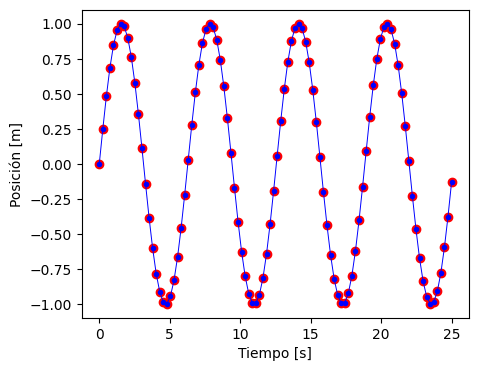

In [14]:
plot(tiempo, sin(tiempo), 'o', c='r' )
plot(tiempo, solucion[:,0], marker='.', linewidth=0.7, c='b')
xlabel("Tiempo [s]")
ylabel("Posición [m]")
show()

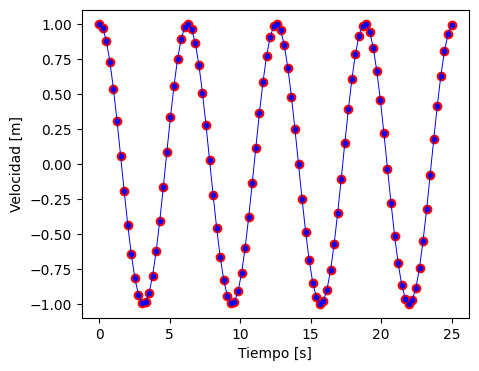

In [15]:
plot(tiempo, cos(tiempo), 'o', c='r' )
plot(tiempo, solucion[:,1], marker='.', linewidth=0.7, c='b')
xlabel("Tiempo [s]")
ylabel("Velocidad [m]")
show()

### Otro método: diferencias finitas

El procedimiento anterior, utilizando `SciPy`, no funciona de forma general para todas las ecuaciones.

Ahora veremos un método muy útil que se puede aplicar a *cualquier* ecuación diferencial: el método de **diferencias finitas**.


En escencia, **<span style="color:blue"> este método nos permitirá transformar una *ecuación diferencial* en una *ecuación algebraica* común.</span>**

Este método es ocupado en simulaciones de la relatividad general, astofísica, cosmología, del clima, etc.

### El método de diferencias finitas

Consideremos la definición fundamental de una derivada:

$$\frac{dx}{dt} = \lim_{h \to 0} \left(\frac{x(t+h) - x(t)}{h}\right)$$

Podemos aproximar la derivada numéricamente usando un valor muy pequeño (pero no nulo) del parámetro $h$:

$$\frac{dx}{dt} \approx \left(\frac{x(t+h) - x(t)}{h}\right)$$

El valor $h$ representará el tamaño de un timestep, lo que corresponde a la *resolución temporal* de la simulación:

| ![](clase1_imagenes/finite_diff.png) |
|------------------------------------|
| Discretización del tiempo        |

Podríamos aplicar exactamente el mismo método a una derivada espacial, por ejemplo $\frac{dy}{dx}$. Eso permitiría realizar una discretización del espacio.

Entonces, evaluamos la derivada usando solamente los puntos $x(t_i)$, que están separados por una distancia $h$.

Para abreviar un poco, podemos escribir estos puntos así:

$$x_i = x(t_i)$$

Y así mismo, también 

$$x_{i+1}=x(t_i + h)$$

Por lo tanto, la aproximación de la derivada, en el punto $t_i$ se puede escribir como

$$\frac{dx}{dt}(t_i) = \frac{x_{i+1} - x_i}{h}$$

Esta aproximación se denomina una diferencia **adelantada**, porque depende del valor de $x$ en el momento $t_i$ y en el siguiente momento $t_{i+1}$.

### Las ecuaciones del oscilador armónico simple de nuevo

Volvemos a las ecuaciones (de primer orden) para el oscilador armónico simple:

$$\frac{dx}{dt} = v$$

$$\frac{dv}{dt} = -\frac{k}{m}x$$

Usando el método de diferencias finitas, podemos aproximar estas ecuaciones con:

$$\frac{dx}{dt}(t_i) = v_i = \frac{x_{i+1} - x_i}{h}$$

$$\frac{dv}{dt}(t_i) = \frac{v_{i+1} - v_i}{h} = -\frac{k}{m}x_i$$

De acá podemos "despejar" la incógnita del tiempo futuro (con subíndices $i+1$), obteniendo así unas *relaciones de recurrencia*:

$$x_{i+1} = hv_i + x_i$$

$$v_{i+1} = -\frac{k}{m}hx_i + v_i$$

Conceptualmente, estas ecuaciones permiten determinar el *estado* del sistema en el instante siguiente a partir de nuestro conocimiento de su estado actual.

Podemos cambiar los índices en las relaciones de recurrencia para tener algo más parecido al programa que escribiremos:

$$x_{i} = hv_{i-1} + x_{i-1}$$

$$v_{i} = -\frac{k}{m}hx_{i-1} + v_{i-1}$$

Las condiciones iniciales definen los valores de $x_0$ y $v_0$. Entonces, podemos calcular $x_1$ y $v_1$ (sus valores en el próximo *paso de tiempo*) con:

$$x_1 = hv_0 + x_0$$

$$v_1 = -\frac{k}{m}hx_0 + v_0$$

Después de este cálculo, podemos obtener los valores de $x$ y $v$ en el próximo paso del tiempo con

$$x_2 = hv_1 + x_1$$

$$v_2 = -\frac{k}{m}hx_1 + v_1$$

Y así sucesivamente...

Ahora vamos a escribir un programa de Python para calcular todos estos valores!

Primero, tenemos que decidir los valores de algunos parámetros:

- Tiempo total de la simulación. Vamos a elegir el mismo tiempo total como antes: 25 segundos.
- Tamaño del paso de tiempo (valor de $h$): 
    - Si este valor es demasiado grande la aproximación a la derivada es muy imprecisa. 
    - Si el valor es muy pequeño, la simulación demorará mucho tiempo y/o ocupará mucha memoria.

In [16]:
tiempo_total = 25.0
h = 0.1

El número de pasos total de la simulación será el tiempo total dividido por el intervalo de cada paso. 

Hacemos una conversión de un número real a un número entero, porque usaremos este valor para especificar el número de elementos que queremos en los arreglos que guardan los valores de $x$, $v$.

In [17]:
pasos_del_tiempo = int(tiempo_total/h)

In [18]:
x = zeros(pasos_del_tiempo)
v = zeros(pasos_del_tiempo)

Asignamos valores a los parámetros $k$ y $m$ como antes:

In [19]:
k = 1.0
m = 1.0

Por las condiciones iniciales del problema, ya sabemos los valores del primer elemento de cada arreglo:

In [20]:
x[0] = 0.0
v[0] = 1.0

Ahora, podemos utilizar un *ciclo for* para tener una iteración sobre todos los pasos del tiempo:
- Usamos una variable $i$ en el ciclo. Esta variable será el índice para los arreglos `x` y `v`.

- Necesitamos que $i$ tome valores entre $1$ y el número total de pasos del tiempo.

- El ciclo comienza en $i=1$, porque ya tenemos los valores para $i=0$ (las condiciones iniciales).

- En cada iteración, calculamos los nuevos valores de $x$ y $v$ en el momento $t = t_i$.

In [21]:
for i in range(1,pasos_del_tiempo):
    x[i] = h*v[i-1] + x[i-1]
    v[i] = -(k/m)*h*x[i-1] + v[i-1]

Para hacer los gráficos, necesitamos los valores del tiempo que hemos usado. Hay una función en NumPy, `arange`, que crea un arreglo de números enteros hasta un máximo.

Si tenemos un arreglo de números enteros que representan los pasos del tiempo, podemos multiplicarlo por $h$ para tener los valores de $t$ en cada momento.

In [22]:
tiempo = arange(pasos_del_tiempo)*h

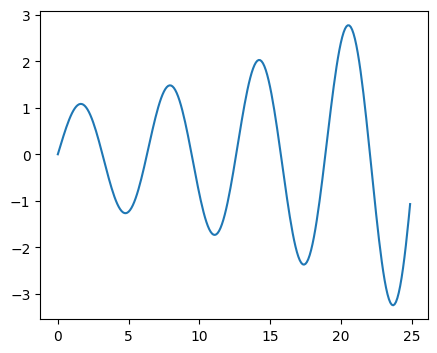

In [23]:
plot(tiempo,x)

Un momento... las oscilaciones crecen! Pero sabemos de la solución analítica (la solución exacta) que deberíamos tener la función $\sin(t)$ como solución.

¿Qué pasó?

Hay que recordar que estamos ***aproximando*** las derivadas con diferencias finitas. Podemos mejorar la aproximación con un valor más pequeño de $h$.

Si vamos a cambiar parámetros y ejecutar el mismo código de nuevo, sería mejor definir una función:

In [24]:
def dif_finita_OAS(tiempo_total, h, k, m, x0, v0):

    pasos_del_tiempo = int(tiempo_total/h)

    x = zeros(pasos_del_tiempo)
    v = zeros(pasos_del_tiempo)

    x[0] = x0
    v[0] = v0

    for i in range(1,pasos_del_tiempo):
        x[i] = h*v[i-1] + x[i-1]
        v[i] = -(k/m)*h*x[i-1] + v[i-1]
    
    tiempo = arange(pasos_del_tiempo)*h
    return( tiempo, x, v )

In [25]:
t, x, v = dif_finita_OAS(25.0, h=0.1, k=1.0, m=1.0, x0=0.0, v0=1.0)

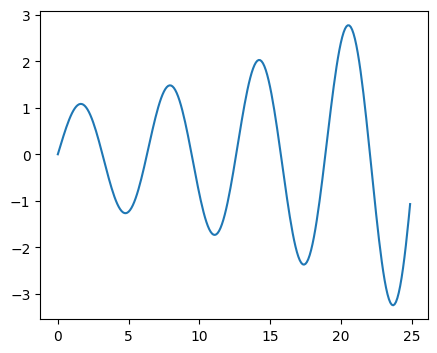

In [26]:
plot(t,x)

In [27]:
t, x, v = dif_finita_OAS(25.0, h=0.01, k=1.0, m=1.0, x0=0.0, v0=1.0)

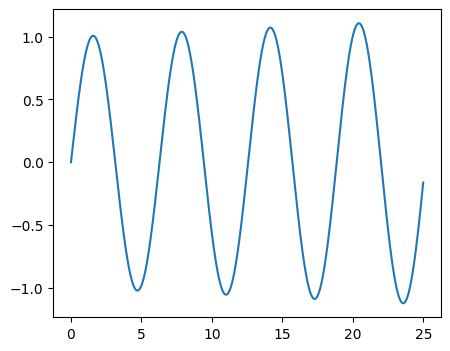

In [28]:
plot(t,x)

Reducir $h$ ha mejorado la situación, pero todavía hay un crecimiento de la amplitud. 

De hecho, es posible mostrar que la aproximación que hemos usado para la derivada es bastante mala (cruda), y nunca tendremos una solución muy precisa.

Pero hay un número infinito de posibles aproximaciones a una derivada con diferencias finitas! Hemos elegido la más simple, pero la menos precisa.

### Diferencias finitas: una mejor aproximación

La aproximación de diferencias finitas que usabamos es:

$$\left(\frac{dx}{dt}\right)_f \approx \frac{x(t+h) - x(t)}{h}$$

Podemos usar una expresión similar en el caso de considerar un punto en la otra dirección simplemente por reemplazar $h$ con $-h$:

$$\left(\frac{dx}{dt}\right)_b \approx \frac{x(t-h) - x(t)}{-h} = \frac{x(t) - x(t-h)}{h}$$

Usamos el valor promedio de estas dos aproximaciones:

$$\frac{1}{2}\left(\frac{dx}{dt}\right)_f + \frac{1}{2}\left(\frac{dx}{dt}\right)_b = \frac{x(t+h) - x(t-h)}{2h}$$

Esta aproximación se llama la **<span style="color:blue">diferencia finita centrada</span>**, y es más precisa que las anteriores. Ahora podemos usar esta aproximación en el programa.


$$\frac{dx}{dt} = \frac{x_{i+1} - x_{i-1}}{2h} = v_i$$

$$\frac{dv}{dt} = \frac{v_{i+1} - v_{i-1}}{2h} = -\frac{k}{m}x_i$$

Reorganizando estas ecuaciones, tenemos:

$$x_{i+1} = 2hv_i + x_{i-1}$$

$$v_{i+1} = -2h\frac{k}{m}x_i + v_{i-1}$$

Ahora tenemos un problema: para calcular $x_1$ y $v_1$ parece que necesitamos los valores $x_{-1}$ y $v_{-1}$, que no existen!

Por eso, usamos de nuevo la versión de diferencia finita anterior (*adelantada*) para calcular los valores de $x_1$ y $v_1$:

$$x_1 = hv_0 + x_0$$

$$v_1 = -\frac{k}{m}hx_0 + v_0$$

Después de eso, podemos calcular $x_2$ y $v_2$ con la nueva aproximación:

$$x_{2} = 2hv_1 + x_{0}$$

$$v_{2} = -2h\frac{k}{m}x_1 + v_{0}$$

y los valores de $x_3$ y $v_3$:

$$x_{3} = 2hv_2 + x_{1}$$

$$v_{3} = -2h\frac{k}{m}x_2 + v_{1}$$

y así sucesivamente...

Podemos cambiar los índices en las relaciones de recurrencia para tener algo más parecido al programa que escribiremos:

$$x_{i} = 2hv_{i-1} + x_{i-2}$$

$$v_{i} = -2h\frac{k}{m}x_{i-1} + v_{i-2}$$

Definimos otra función:

In [29]:
def dif_finita_OAS_2(tiempo_total, h, k, m, x0, v0):

    pasos_del_tiempo = int(tiempo_total/h)

    x = zeros(pasos_del_tiempo)
    v = zeros(pasos_del_tiempo)

    x[0] = x0
    v[0] = v0

    ## Calculamos los valores de x_1, v_1 con la
    ## aproximación que vimos antes
    x[1] = h*v[0] + x[0]
    v[1] = -(k/m)*h*x[0] + v[0]
    
    ## El ciclo comienza en 2 ahora!
    for i in range(2, pasos_del_tiempo):
        x[i] = 2*h*v[i-1] + x[i-2]
        v[i] = -(k/m)*2*h*x[i-1] + v[i-2]
    
    tiempo = arange(pasos_del_tiempo)*h
    return( tiempo, x, v )

Vamos a probar esta versión del programa con el valor original de $h$, $h = 0.1$:

In [30]:
t2, x2, v2 = dif_finita_OAS_2(25.0, h=0.1, k=1.0, m=1.0, x0=0.0, v0=1.0)

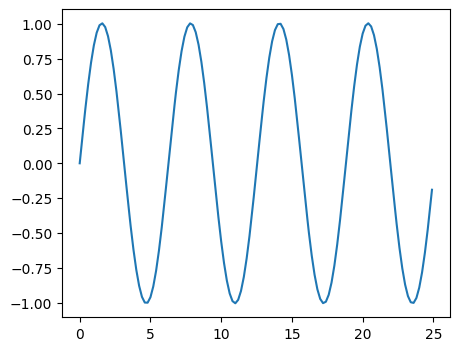

In [31]:
plot(t2,x2)

In [32]:
t, x, v = dif_finita_OAS(25.0,h=0.1,k=1.0,m=1.0,x0=0.0,v0=1.0)

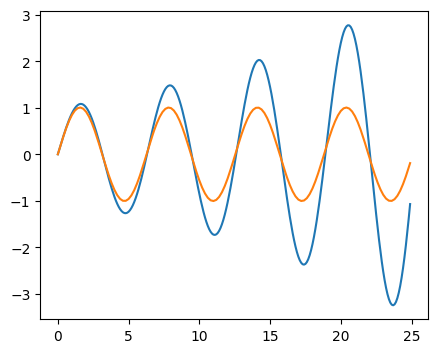

In [33]:
plot(t,x)
plot(t2,x2)

## Ejemplos del método de diferencias finítas: péndulos

In [34]:
%%HTML
<div align="middle">
<video width="100%" controls>
      <source src="clase1_imagenes/single_pendulum.mp4" type="video/mp4">
</video></div>

In [35]:
%%HTML
<div align="middle">
<video width="100%" controls>
      <source src="clase1_imagenes/simple_pendulum_error.mp4" type="video/mp4">
</video></div>

In [36]:
%%HTML
<div align="middle">
<video width="100%" controls>
      <source src="clase1_imagenes/double_pendulum.mp4" type="video/mp4">
</video></div>

## Resumen

El oscilador armónico simple es útil para ilustrar los métodos numéricos, ya que además conocemos su solución analítica (exácta).

Sin embargo, para sistemas más complicados (o con muchos componentes) se hace *necesario* recurrir a las simulaciones.

* Las ecuaciones de la Relatividad General de Einstein, por ejemplo, son **no-lineales** y por lo tanto muy difíciles de resolver.

* Incluso las ecuaciones de la gravedad de Newton, en el caso de más que $2$ partículas, no tienen una solución exacta: hay que resolverlas numericamente.

* Aunque la función `odeint` que usabamos funciona muy bien para ecuaciones diferenciales simples, no sirve para ecuaciones más complicadas, por ejemplo las ecuaciones diferenciales *parciales* que aparacen todo el tiempo en la física.

El método de **diferencias finitas**, por otra parte, aplica a *cualquier* sistema de ecuaciones diferenciales, y por eso es muy utilizado en simulaciones.

## Métodos de Monte Carlo

En la física cuántica es muy común usar el método de Monte Carlo. Este método utiliza números aleatorios para evaluar integrales.

Por eso recibe su nombre por un casino famoso en Mónaco:

![](clase1_imagenes/monte_carlo.jpg)

En la física cuántica, las posiciones de las partículas no están totalmente localizadas: 
* Pueden no solamente seguir un camino en el espacio entre dos puntos.
* También puede que tomen **todos** los caminos entre dos puntos!

<img style="float: center;" src="clase1_imagenes/path_integral.jpg " alt="alt text" width="300" height="300" class="blog-image">

En la física estadística, también tratamos el sistema de forma probabilistica porque hay tantas partículas que es imposible analizarlas individualmente.

Por estas razones, los métodos de Monte Carlo son muy utilizados en estudios del comportamiento de la materia al nivel microscópico.

### Cálculos en la física cuántica o estadística

Típicamente en la física cuántica o estadística, queremos calcular **valores promedios** de algunas propiedades del sistema. Por ejemplo, el valor promedio de la energía de todas las partículas.

Matemáticamente, calcular un promedio corresponde a la **evaluación de una integral**. En un sistema como el núcleo de un átomo, las integrales que tenemos que evaluar típicamente son muy complicadas y multidimensionales.

##### Las integrales

Se puede interpretar una integral como el área debajo de una curva:

![](clase1_imagenes/Integral_example.png)

Numéricamente podemos aproximar las integrales con muchas divisiones del área en rectángulos. Así el problema se reduce al sumatorio de las áreas de muchos rectángulos. Aquí está un ejemplo en una dimensión:

![](clase1_imagenes/integral_approx.png)

De hecho con un procedimiento así uno puede **definir** la integral de una función. Se encuentra el valor exacto de la integral en el límite de un número infinito de rectángulos con anchos infinitesimalmente pequeños.

Como lo que vimos para las derivadas (valores de $h$ pequeños pero no nulos), es posible aproximar una integral numéricamente por el uso de rectángulos muy estrechos, pero todavía con tamaño finito.

Entonces, puede ser que podemos tener una aproximación aceptable de la integral de una función con $1000$ rectángulos, por ejemplo.

También se puede definir la integración en más dimensiones. Por ejemplo, se puede determinar el volumen de una forma geométrica:

![](clase1_imagenes/vol_integral.jpg)

* Supogamos que necesitamos $1000$ divisiones en cada dimensión para calcular una integral de un volumen en $3$ dimensiones a una precisión aceptable. 

* Esto corresponde a $1000^3 = 10^9$ cubitos!

* En la física cuántica y estadística es común tener integrales de $10^6 - 10^9$ **dimensiones**! 

* Es totalmente imposible evaluar una integral así con los métodos normales de dividir el "volumen" en muchos "cubitos" pequeños.

* Pero, hay otro método que sirve - el **Método de Monte Carlo**.

### Ejemplo: calculando el valor de $\pi$ con un método de Monte Carlo

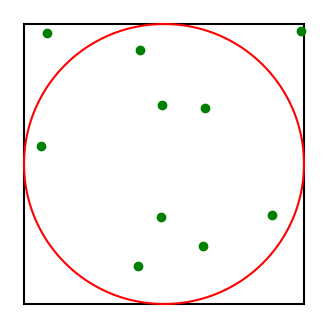

In [37]:
axis("off")
plot([-1.0,-1.0],[-1.0,1.0],'k-')
plot([1.0,1.0],[-1.0,1.0],'k-')
plot([-1.0,1.0],[1.0,1.0],'k-')
plot([-1.0,1.0],[-1.0,-1.0],'k-')
theta = linspace(0.0,2*pi,1000)
gca().set_aspect('equal', adjustable='box')
plot(cos(theta),sin(theta),'r-')
x = random.uniform(low=-1.0,high=1.0,size=10)
y = random.uniform(low=-1.0,high=1.0,size=10)
plot(x,y,'go')

Consideremos un círculo con radio $r$ circunscrito dentro de un cuadrado, donde cada lado tiene longitud $2r$:

<img style="float: right;" src="clase1_imagenes/circlesquare1.png">

* El área del círculo es $M = \pi r^2$.
* El área del cuadrado es $N = 4r^2$. 

Entonces tenemos:

$$\frac{M}{N} = \frac{\pi}{4}$$

Así que es posible calcular $\pi$ a través del cuociente:

$$\pi = 4M/N$$

#### Estimando el área del círculo con números aleatorios

<img style="float: right;" src="clase1_imagenes/circlesquare2.png">


Ahora podemos elegir números aleatorios entre $-1$ y $1$ para las coordenadas $x$ y $y$. 
Estos puntos **siempre estarán dentro del cuadrado**, pero no siempre dentro del círculo:

La probabilidad de tener un punto dentro del círculo es proporcional al área del círculo: $p_{circ} \propto M$.

La probabilidad de tener un punto dentro del cuadrado es proporcional al área del cuadrado: $p_{cuad} \propto N$. 

Por lo tanto, tenemos:

$$\frac{p_{circ}}{p_{cuad}} = \frac{M}{N}$$



<img style="float: right;" src="clase1_imagenes/circlesquare2.png">

Dado que los puntos *siempre* están dentro del cuadrado, 

$$p_{cuad} = 1$$

por lo que el cuociente anterior puede escribirse como

$$p_{circ} = M/N$$

Si tenemos $n$ puntos en total, la probabilidad de tener $m$ puntos dentro del círculo está dada por $p_{circ} = m/n$. Por ende, tenemos una relación entre el número de puntos y los áreas:

$$\frac{m}{n} = \frac{M}{N}$$

Vamos a usar está relación para estimar el valor de $\pi$.

Primero, generamos $10$ números aleatorios entre $-1$ y $1$ que son las coordenadas en $x$ (dentro del cuadrado):

In [38]:
x = random.uniform(low=-1.0,high=1.0,size=10)

Ahora generamos $10$ números aleatorios más dentro el mismo rango para las coordenadas $y$:

In [39]:
y = random.uniform(low=-1.0,high=1.0,size=10)

Calculamos el radio de todos los puntos.

In [40]:
r = sqrt(x**2 + y**2)

In [41]:
sympy.init_printing(pretty_print=False)

Comparamos estos radios con el radio del círculo (que es $r = 1$). Si su radio es mayor que $1$, ese punto no está dentro del círculo.

In [42]:
r

array([0.53211976, 0.97058278, 1.16745815, 0.59565166, 0.74339391,
       0.86875641, 0.28885551, 1.17722448, 0.78311334, 0.91377612])

Hay algunos valores mayor que $1$. Podemos calcular cuantos por el uso de un arreglo *Booleano*.

In [43]:
r > 1.0

array([False, False,  True, False, False, False, False,  True, False,
       False])

In [44]:
sum(r > 1.0)

2

La sumatoria de un arreglo Booleano solamente cuenta los valores de *True* (verdad).

Entonces, el número total de puntos dentro del círculo está dado por:

In [45]:
sum(r <= 1.0)

8

Ahora, calculamos la razón entre el número de puntos dentro del círculo y el número total.

In [46]:
sum(r <= 1.0)/len(r)

0.8

Este es el valor de $M/N$ (para solamente $10$ puntos). El valor de $\pi$ está dado por $4M/N$:

In [47]:
4.0*sum(r <= 1.0)/len(r)

3.2

El resultado no es muy preciso... 

Pero podemos usar más números aleatorios. Ahora hacemos un ciclo *for* para ver como el resultado mejora con más números aleatorios. Primero, definimos una lista de números totales de puntos que usaremos en cada ciclo:

In [48]:
numeros_totales = [x for x in range(100,10100,100)]

In [49]:
numeros_totales

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000]

Creamos una lista vacía para guardar los resultados de cada cálculo del valor de $\pi$.

In [50]:
resultados = []

Ahora estimamos el valor de $\pi$ con diferentes números totales de puntos aleatorios.

In [51]:
for n in numeros_totales: # Ciclo sobre todos los valores de "n"
    x = random.uniform(low=-1.0,high=1.0,size=n) #n números aleatorios para x
    y = random.uniform(low=-1.0,high=1.0,size=n) #n números aleatorios para y
    r = sqrt(x**2 + y**2) #Los radios de los puntos
    m = sum(r <= 1.0) #Cuantos puntos hay dentro del círculo, el valor "m"
    resultados.append( 4.0*m/n ) #Agregamos el valor estimado de pi

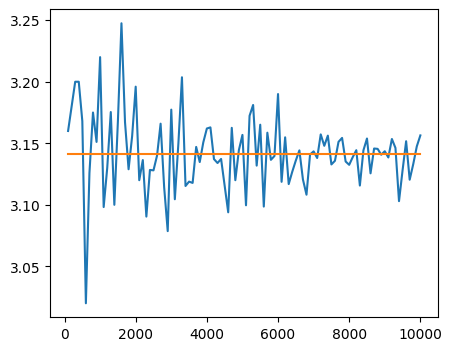

In [52]:
plot(numeros_totales,resultados)
plot([numeros_totales[0],numeros_totales[-1]],[pi,pi])

Vemos que la aproximación al valor de $\pi$ mejora a medida que consideramos más números aleatorios!

#### Resumen: simulaciones de Monte Carlo

* Lo que hicimos en este ejemplo fue evaluar una integral de *volumen* (en $2$ dimensiones, así que es un *área*) con números aleatorios. Este es un ejemplo de integración de Monte Carlo.

* También podemos usar números aleatorios para *simular* sistemas físicos. Esto es muy útil en la física estadística y la física cuántica. Un ejemplo sería una simulación de Monte Carlo para calcular la energía promedio de un gas cuántico.

#### Una nota sobre números aleatorios

* Los computadores son sistemas *deterministas*. Los algoritmos también son deterministas. Este significa que no podemos usar un algoritmo computacional para generar números que son verdaderamente aleatorios.

* Lo que podemos hacer es generar números *pseudo-aleatorios*. Estos son números que parecen aleatorios, aunque están generados por un algorítmo determinista.

Hay más información en Wikipedia:

https://es.wikipedia.org/wiki/Generador_de_números_pseudoaleatorios

# Resumen

* La física se trata de la aplicación de ecuaciones matemáticas a la naturaleza.
* La mayoría de los sistema físicos reales se describen mediante ecuaciones que no pueden resolverse analíticamente ("con lápiz y papel").
* Sin embargo, **sí** podemos resolverlos numéricamente con una simulación computacional.
* Hay varias técnicas para hacer simulaciones, por ejemplo: diferencias finitas, Monte Carlo, ... .